# Plotting FFT data

In [1]:
!which python
import sys
sys.executable

/Users/stianismar/Dropbox/gitProsjekter/master-thesis/venv/bin/python


'/Users/stianismar/Dropbox/gitProsjekter/master-thesis/venv/bin/python'

In [27]:
import numpy as np
import wt_data
import ff_transform
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d import Axes3D

import random

# For Gearbox
This feature has the name 'GbxHssRr;0,0102;m/s2'.

In [13]:
'''
wt_name is either 'WTG01', 'WTG02', 'WTG03', or 'WTG04'

'''
def load_interval(wt_name, BINS,SENSOR_NAME, load_minimal=False):
    wt_instance = wt_data.load_instance(wt_name, load_minimal=False)
    print(f"This is the amount of intervals: {len(wt_instance.ten_second_intervals)}")
    
    y = []
    x = []
    z = []
    i = 0
    for interval in wt_instance.ten_second_intervals:
        ts = interval.sensor_df['TimeStamp'].values  # Have this as the y-axis to see how the RMS/frequencies develop

        # y_val = np.array([ts[0]])

        # Have the x axis as frequency!
        # Have the Z axis as amplitude of frequency...
        try:
            vibration_signal = interval.sensor_df[SENSOR_NAME]
        except:
            continue


        y_repeated = np.repeat(i, 50)  # Repeat this y value n times to use as the y value for the corresponding x (frequency) and z (magnitude)
        y.append(y_repeated)
        i = i + 1

        comp_type = 'gearbox'
        fast = ff_transform.FastFourierTransform(vibration_signal, ts, comp_type)
        fft, time, centroid, rms, rms_bins, bin_freq = fast.fft_transform_time(calc_rms_for_bins=True,
                                                                     plot=False,
                                                                     bins=BINS,
                                                                     plot_vertical_lines=False)
        N = fast.s.size
        T = fast.t[1] - fast.t[0]
        f = np.linspace(0, 1 / T, N, )
        f = f[:N // 2]



        # z_amp = np.abs(fft)[:N // 2] * 1 / N
        z.append(rms_bins)

        x.append(bin_freq)
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    return x,y,z

In [15]:
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50

freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01 = load_interval('WTG01',
                                                                    BINS,
                                                     SENSOR_NAME,
                                                     load_minimal=False)

print(freqs_wt01.shape)
print(rms_amplitudes_wt01.shape)
print(interval_nums_wt01.shape)



Loading WTG01...
Loaded WTG01
This is the amount of intervals: 415
(414, 50)
(414, 50)
(414, 50)


**freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01** can now be used to make 3d plots. The frequencies are a part of the x axis, the amplitude is the z axis and the y axis is the time 

## Creating a 3d plot using PolyCollection

In [65]:
'''
    Create a 3d-plot using the poly collection module from matplotlib.
'''

from matplotlib import cm, pyplot as plt

def print3d_with_poly_collection(x,y,z,color_alt,cm_style='Blues'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Get the numpy arrays on the correct shape
    freq_data = x.T
    amp_data = z.T
    rad_data = np.linspace(0,amp_data.shape[1],amp_data.shape[1])
    
    
    verts = []

    for irad in range(len(rad_data)):
        # I'm adding a zero amplitude at the beginning and the end to get a nice
        # flat bottom on the polygons
        xs = np.concatenate([[freq_data[0,irad]], freq_data[:,irad], [freq_data[-1,irad]]])
        ys = np.concatenate([[0],amp_data[:,irad],[0]])
        verts.append(list(zip(xs, ys)))

    # Colors:
    
    
    if color_alt == 'color_alt1':
        # ALT_1:
        col = []
        for i in range(freq_data.shape[1]):
            a = [0, random.uniform(0, 0.1),random.uniform(0.5, 1.0)]
            col.append(a)
        poly = PolyCollection(verts, facecolors = col)

    
    elif color_alt == 'color_alt2':
        # ALT_2
        cmap = cm.get_cmap(cm_style)
        col = [cmap(x) for x in np.random.rand(amp_data.shape[1])]
        poly = PolyCollection(verts, facecolors = col)
    
    else:
        poly = PolyCollection(verts)


    
    # facecolors = col


    # facecolors = ['r', 'g', 'c', 'y','r', 'g', 'c', 'y','r', 'g', 'c']
    poly.set_alpha(0.7)
    # poly.set_cmap('blues')

    

    # The zdir keyword makes it plot the "z" vertex dimension (radius)
    # along the y axis. The zs keyword sets each polygon at the
    # correct radius value.
    ax.add_collection3d(poly, zs=rad_data, zdir='y')

    ax.set_xlim3d(freq_data.min(), freq_data.max())
    ax.set_xlabel('Frequency')
    ax.set_ylim3d(rad_data.min(), rad_data.max())
    ax.set_ylabel('Radius')
    ax.set_zlim3d(amp_data.min(), amp_data.max())
    ax.set_zlabel('Amplitude')

    plt.show()

## Creating surface 3d plots with axes3d

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def print3d_with_axes3d(x,y,z,cm_style='Blues'):
    X = np.array(x)
    Y = np.array(y)
    Z = np.array(z)
    
    X = X.T
    Y = Y.T
    Z = Z.T
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    cmap = cm.get_cmap(cm_style)
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,
                           linewidth=0, antialiased=False)
    plt.title("Frequency development over intervals for WT")
    plt.show()

## Running the functions
Loading up the WT's

**WTG01**

In [ ]:
WIND_TURBINE = 'WTG01'
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50

freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01 = load_interval(WIND_TURBINE,
                                                                    BINS,
                                                     SENSOR_NAME,
                                                     load_minimal=False)

print(freqs_wt01.shape)
print(rms_amplitudes_wt01.shape)
print(interval_nums_wt01.shape)


**WTG02**

In [113]:
WIND_TURBINE = 'WTG02'
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50

freqs_wt02, interval_nums_wt02, rms_amplitudes_wt02 = load_interval(WIND_TURBINE,
                                                                    BINS,
                                                     SENSOR_NAME,
                                                     load_minimal=False)

print(freqs_wt02.shape)
print(rms_amplitudes_wt02.shape)
print(interval_nums_wt02.shape)



Loading WTG02...
Loaded WTG02
This is the amount of intervals: 426


/Users/stianismar/Dropbox/gitProsjekter/master-thesis/src/data_processing/ff_transform.py:202: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  amp = fft_modulus_norm[filter_indexes]


(426, 50)
(426, 50)
(426, 50)


**WTG03**

In [ ]:
WIND_TURBINE = 'WTG03'
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50

freqs_wt03, interval_nums_wt03, rms_amplitudes_wt03 = load_interval(WIND_TURBINE,
                                                                    BINS,
                                                     SENSOR_NAME,
                                                     load_minimal=False)

print(freqs_wt03.shape)
print(rms_amplitudes_wt03.shape)
print(interval_nums_wt03.shape)


**WTG04**

In [ ]:
WIND_TURBINE = 'WTG04'
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50

freqs_wt04, interval_nums_wt04, rms_amplitudes_wt04 = load_interval(WIND_TURBINE,
                                                                    BINS,
                                                     SENSOR_NAME,
                                                     load_minimal=False)

print(freqs_wt04.shape)
print(rms_amplitudes_wt04.shape)
print(interval_nums_wt04.shape)


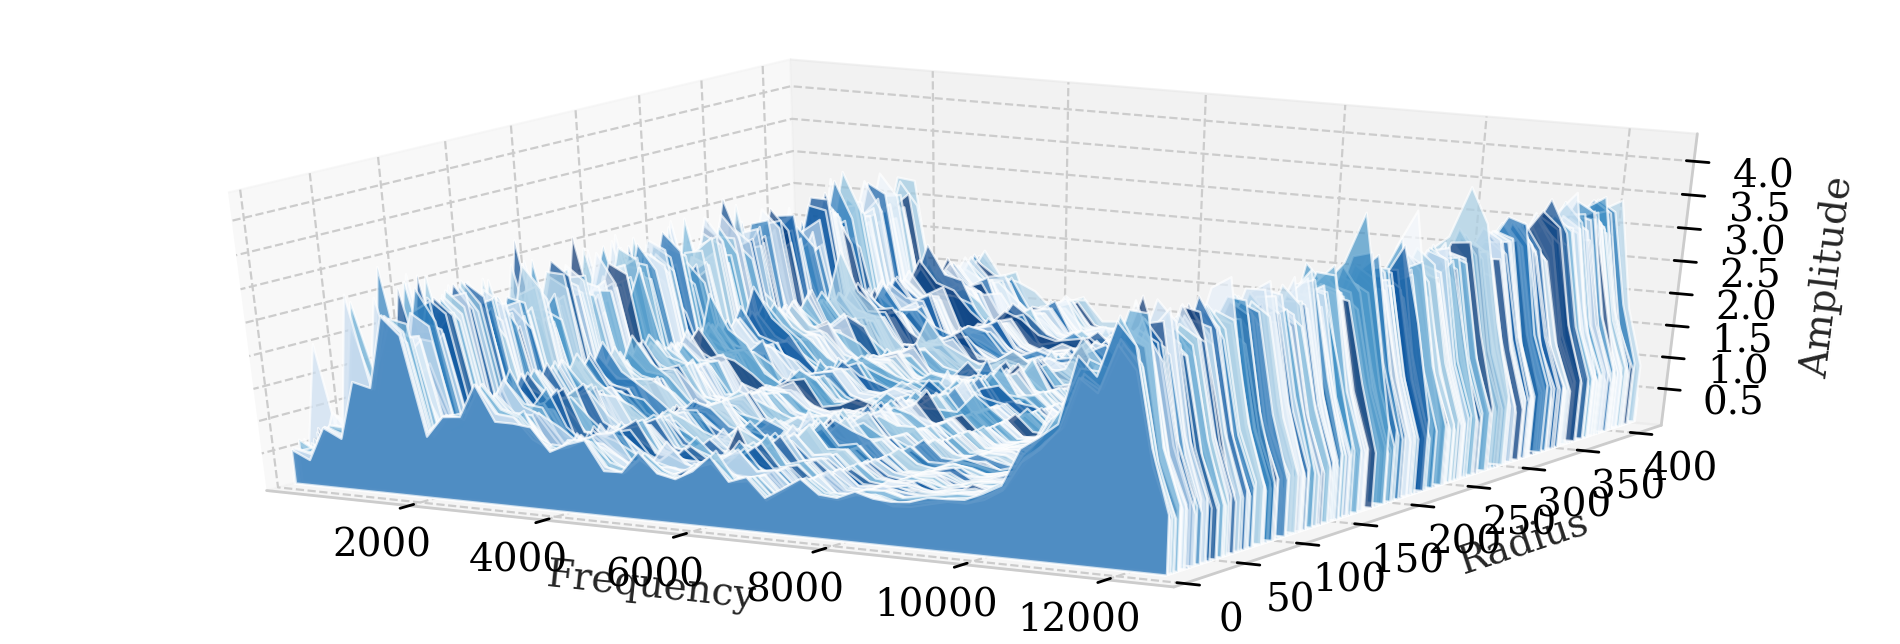

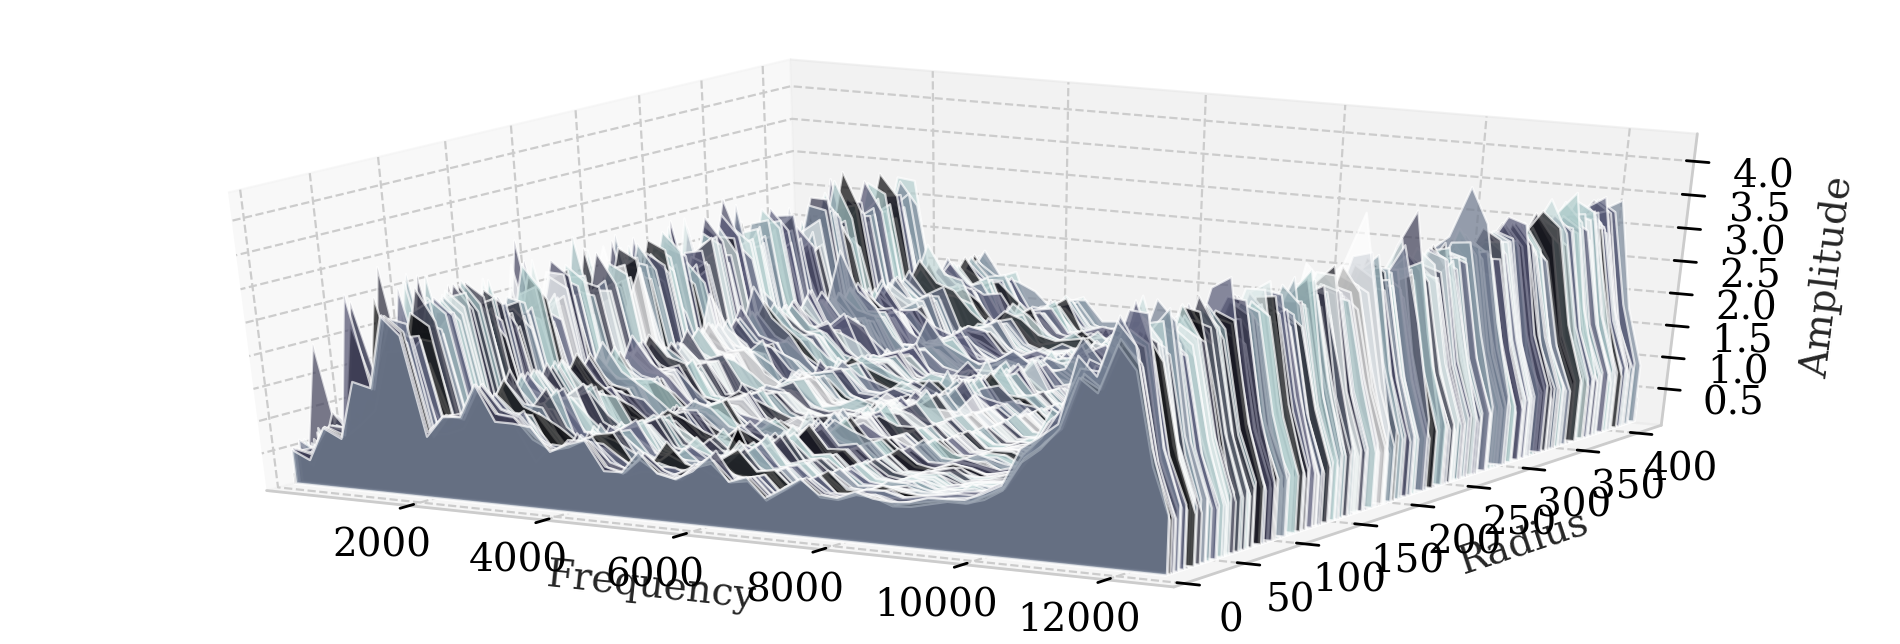

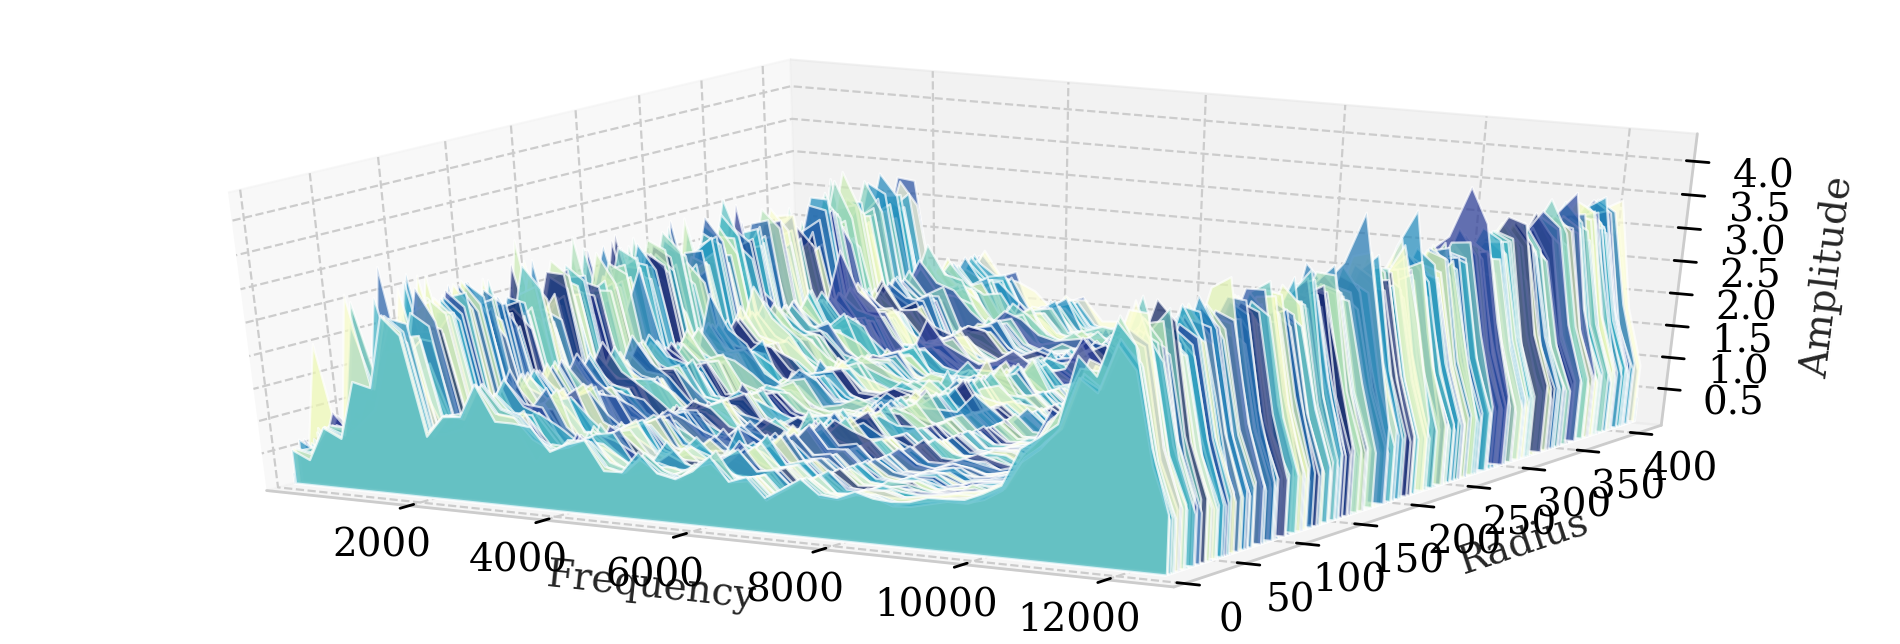

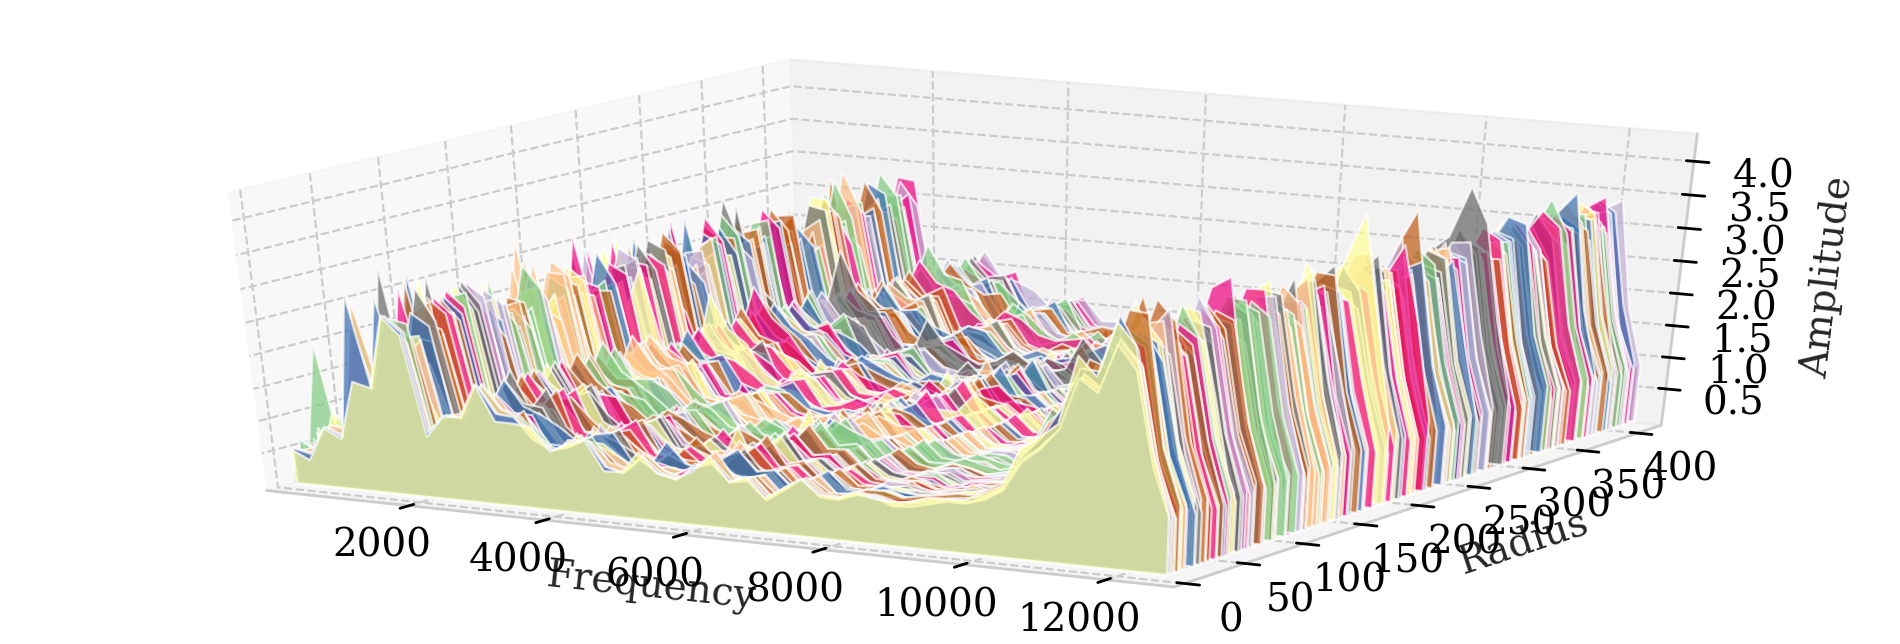

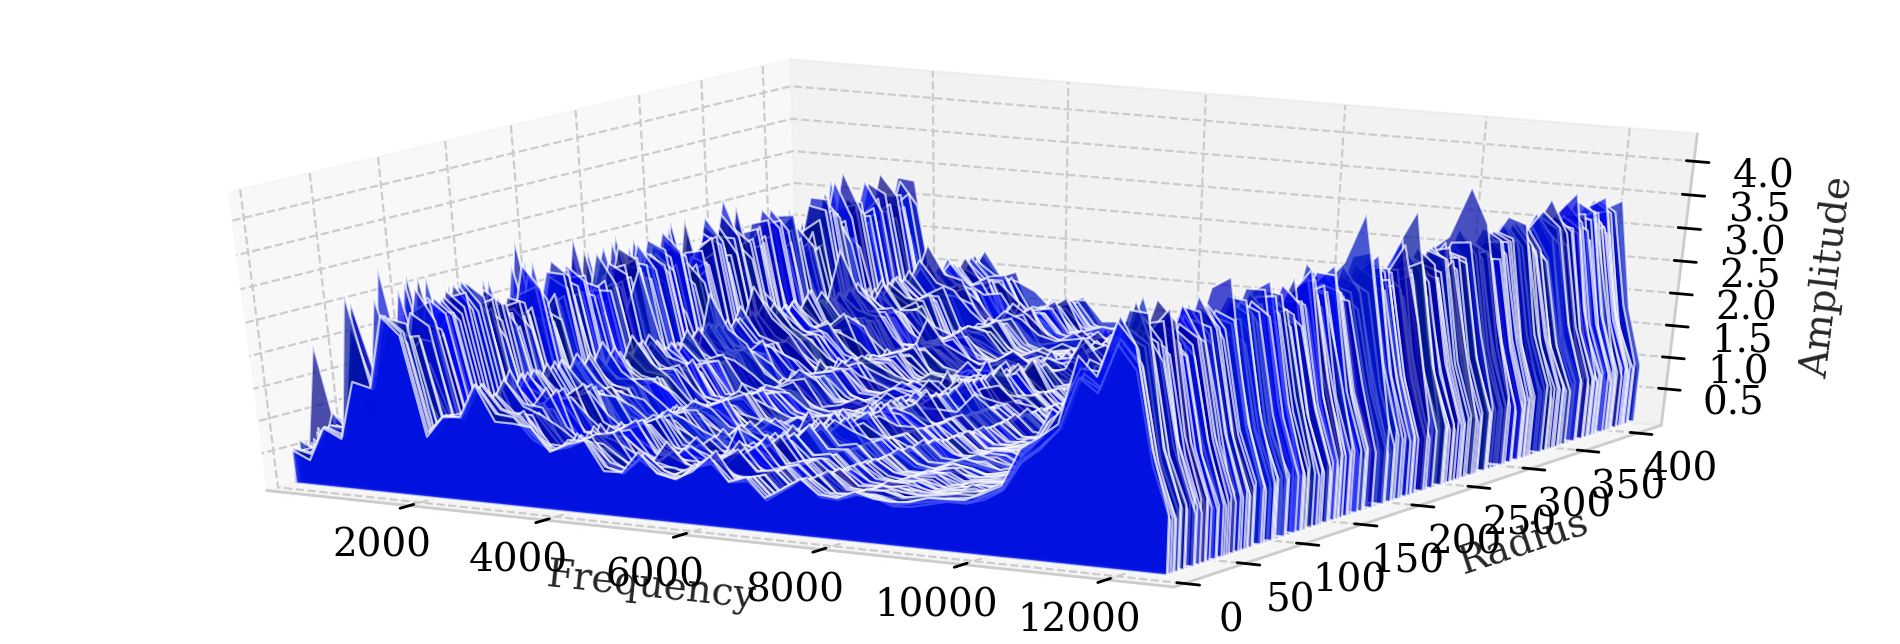

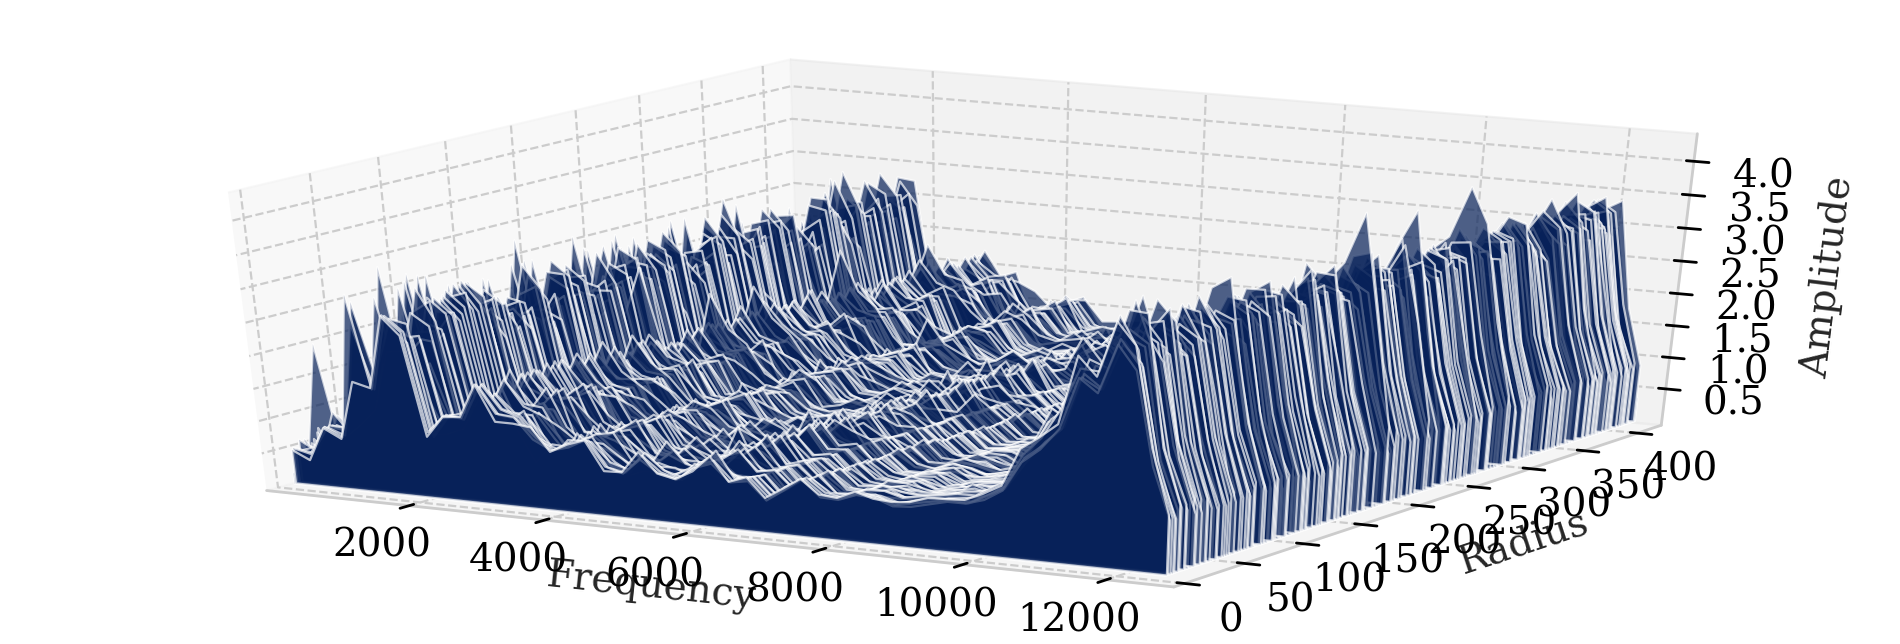

In [66]:
print3d_with_poly_collection( freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01,'color_alt2','Blues' )
print3d_with_poly_collection( freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01,'color_alt2','bone' )

print3d_with_poly_collection( freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01,'color_alt2','YlGnBu' )
print3d_with_poly_collection( freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01,'color_alt2','Accent' )
print3d_with_poly_collection( freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01,'color_alt1' )
print3d_with_poly_collection( freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01,'color_alt3' )

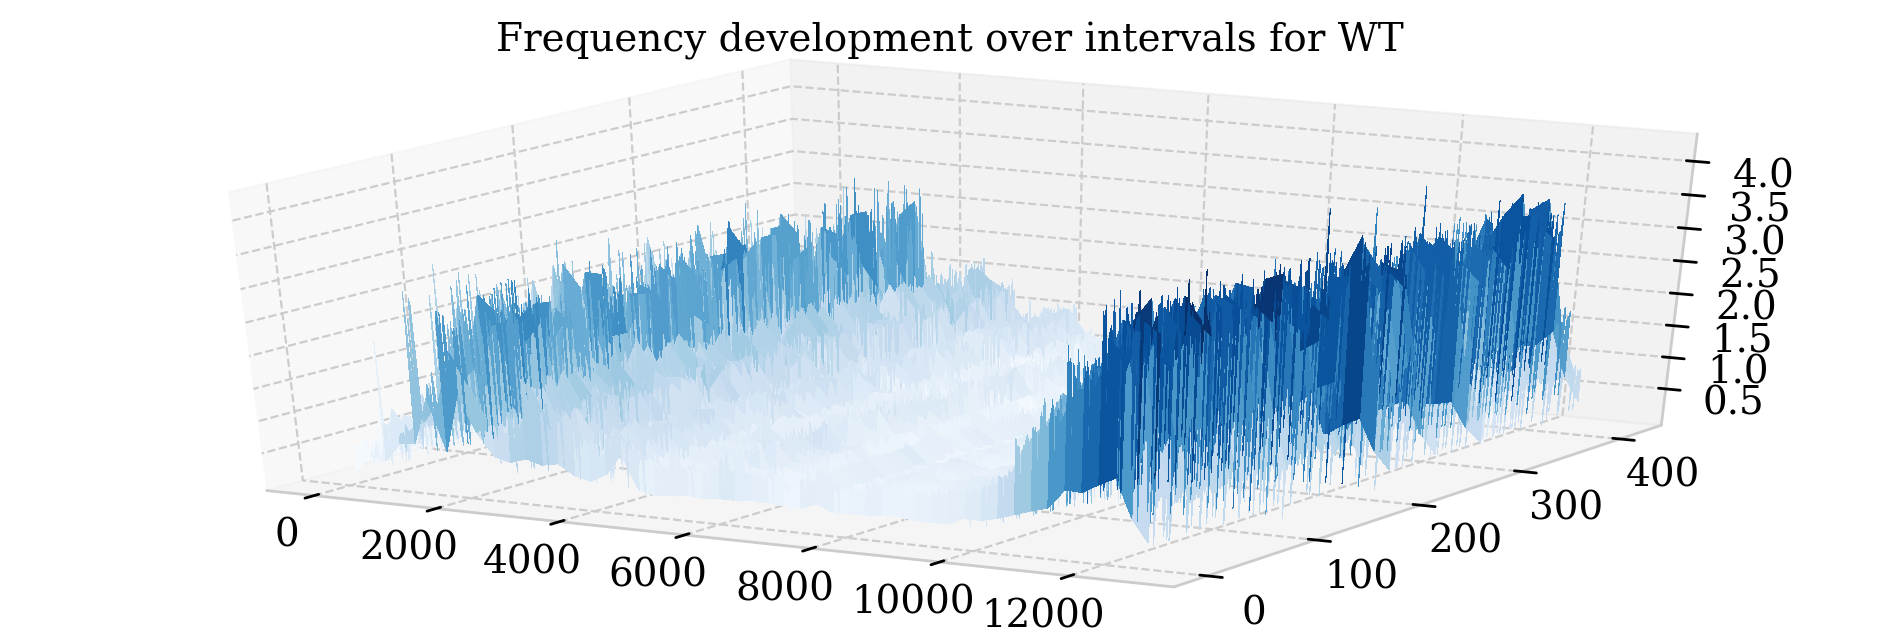

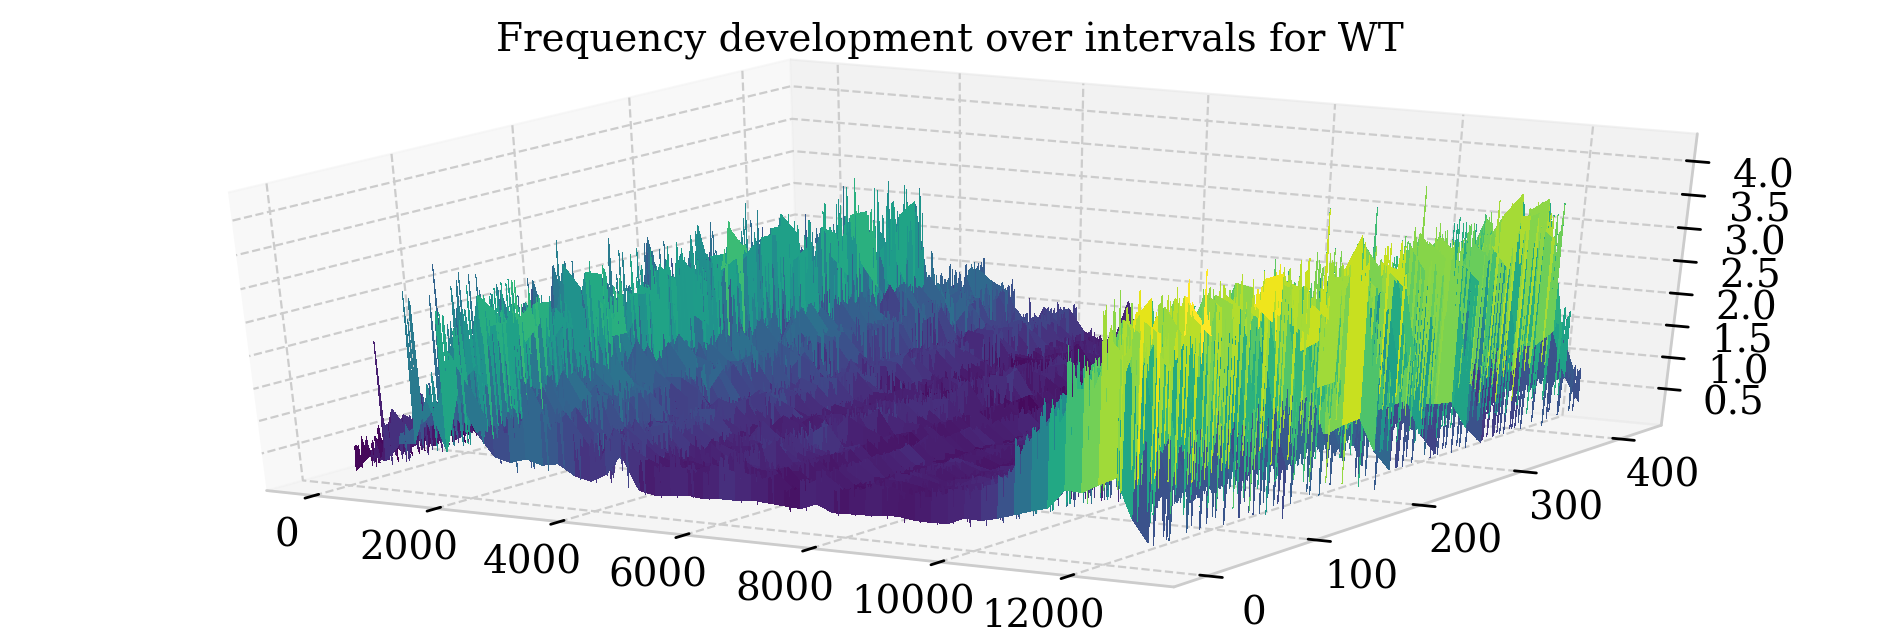

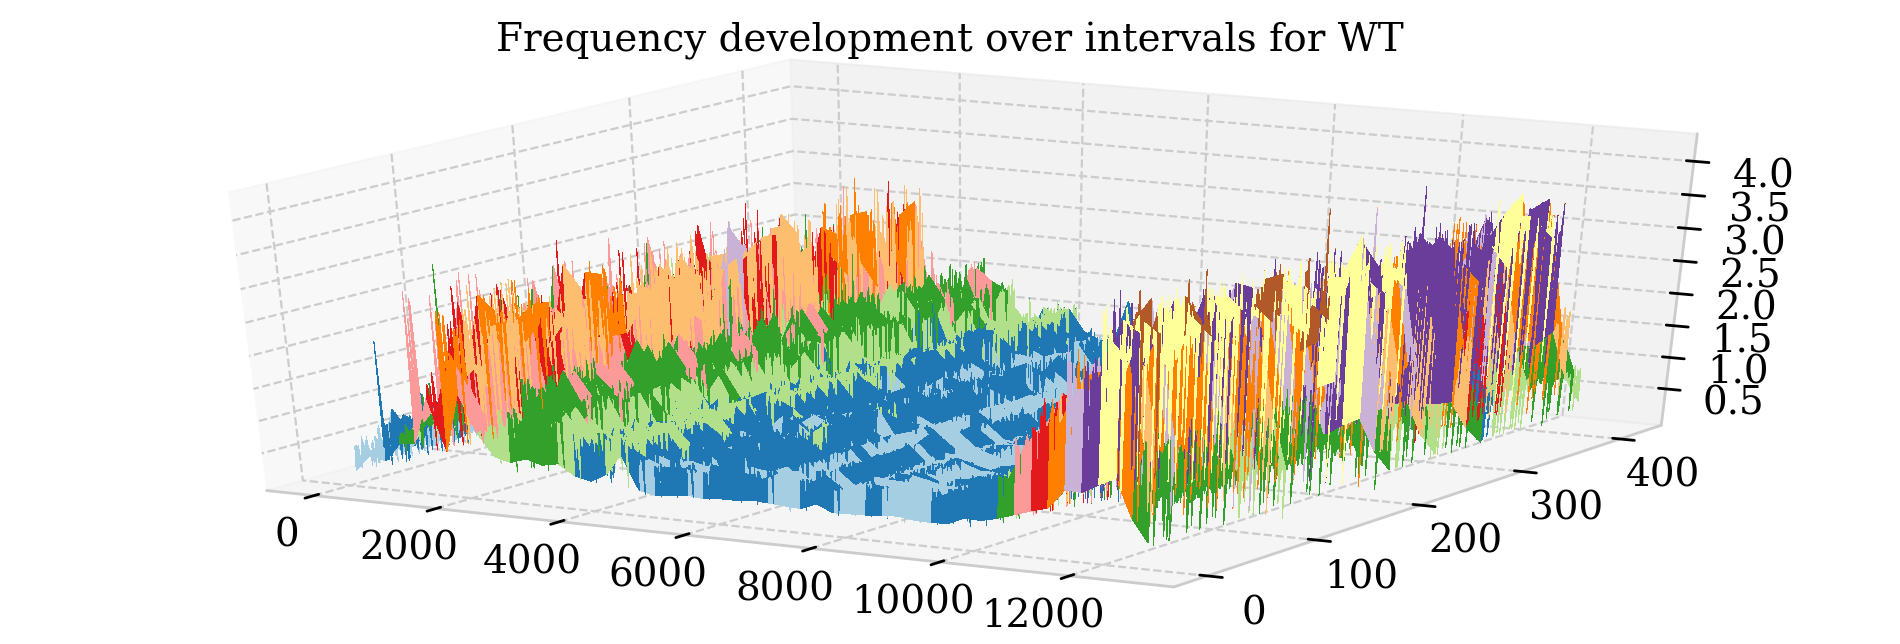

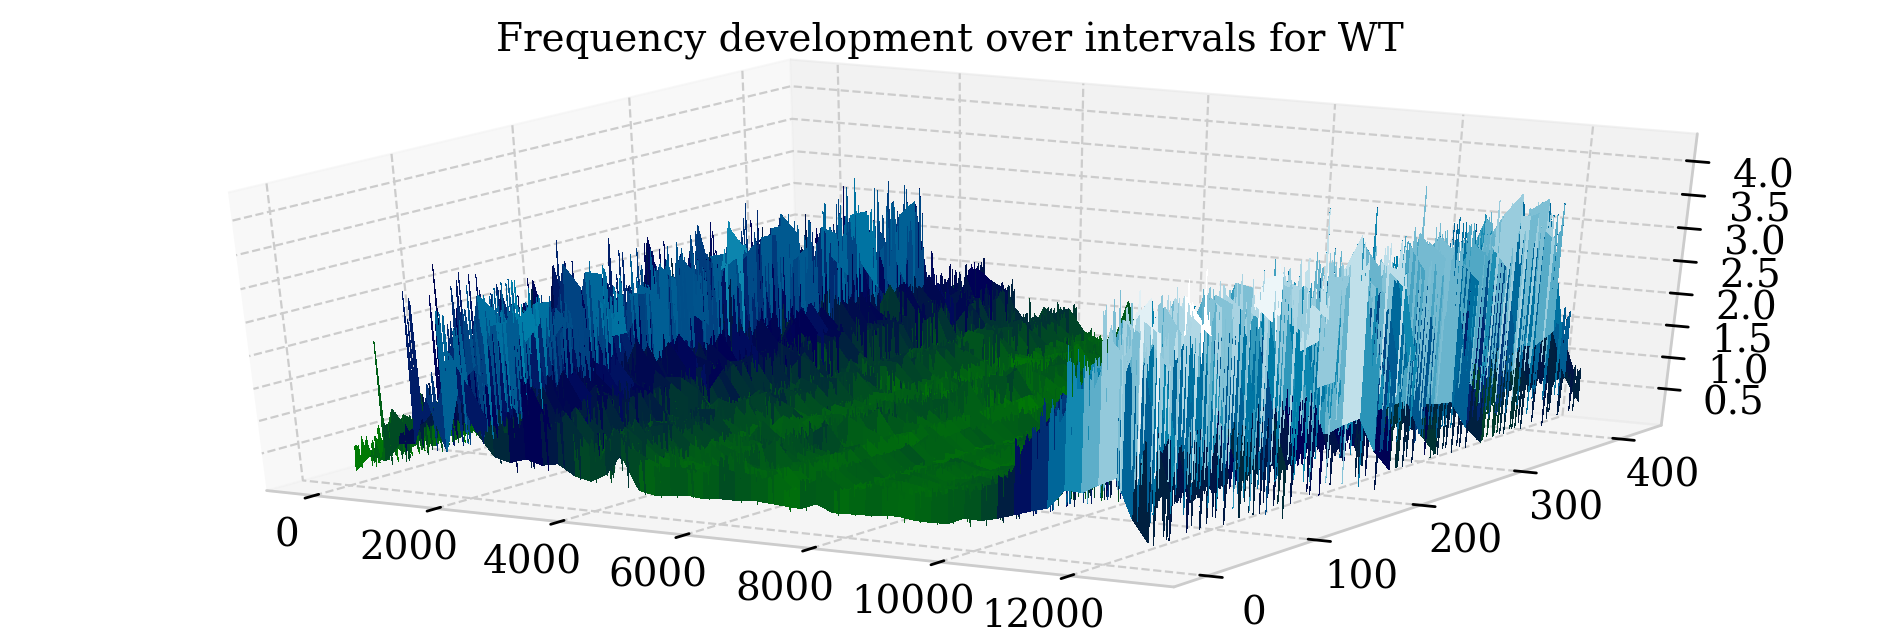

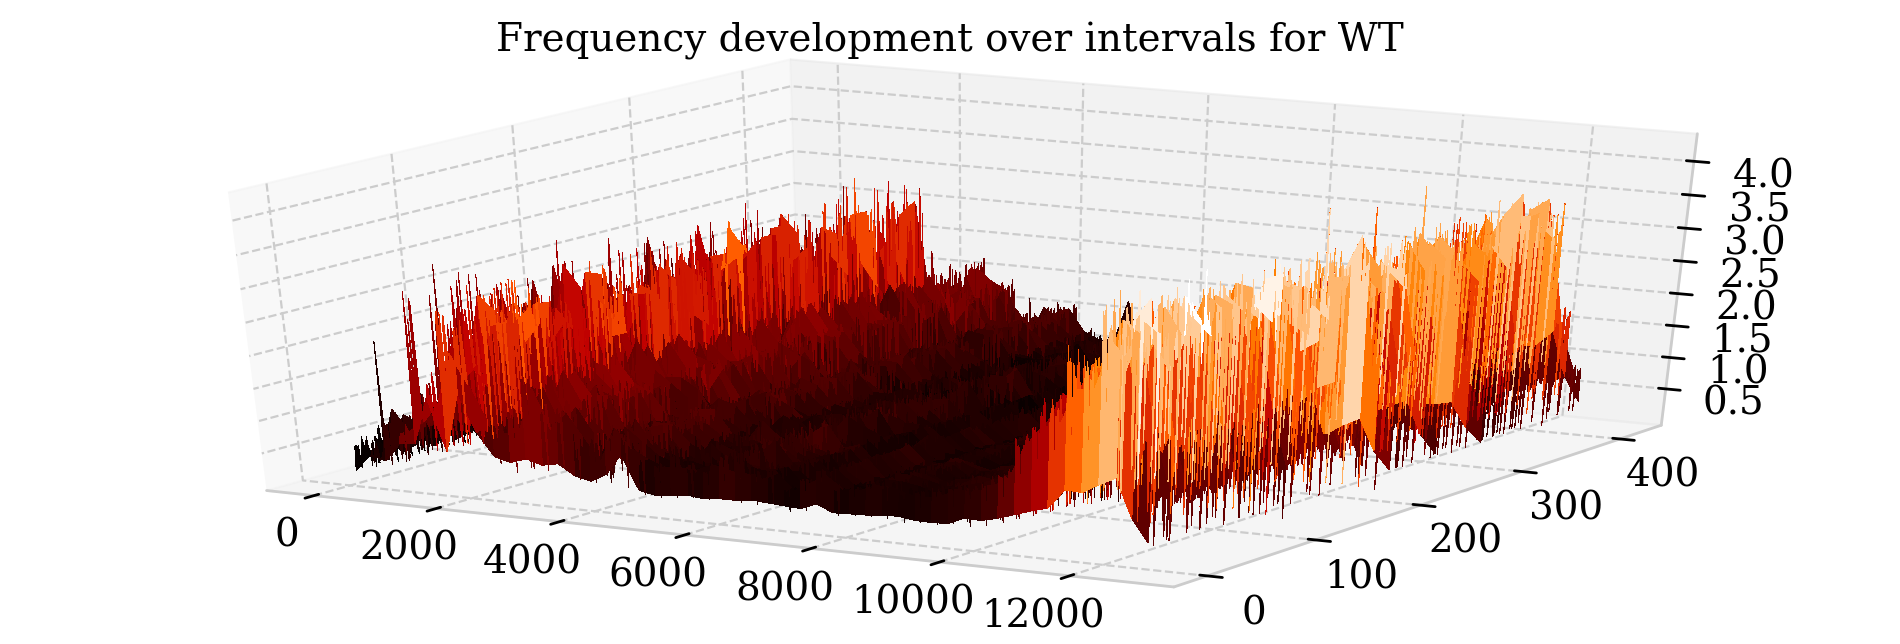

In [112]:
print3d_with_axes3d( freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01)
print3d_with_axes3d( freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01, cm_style='viridis')

print3d_with_axes3d( freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01, cm_style='Paired')

print3d_with_axes3d( freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01, cm_style='ocean')
print3d_with_axes3d( freqs_wt01, interval_nums_wt01, rms_amplitudes_wt01, cm_style='gist_heat')


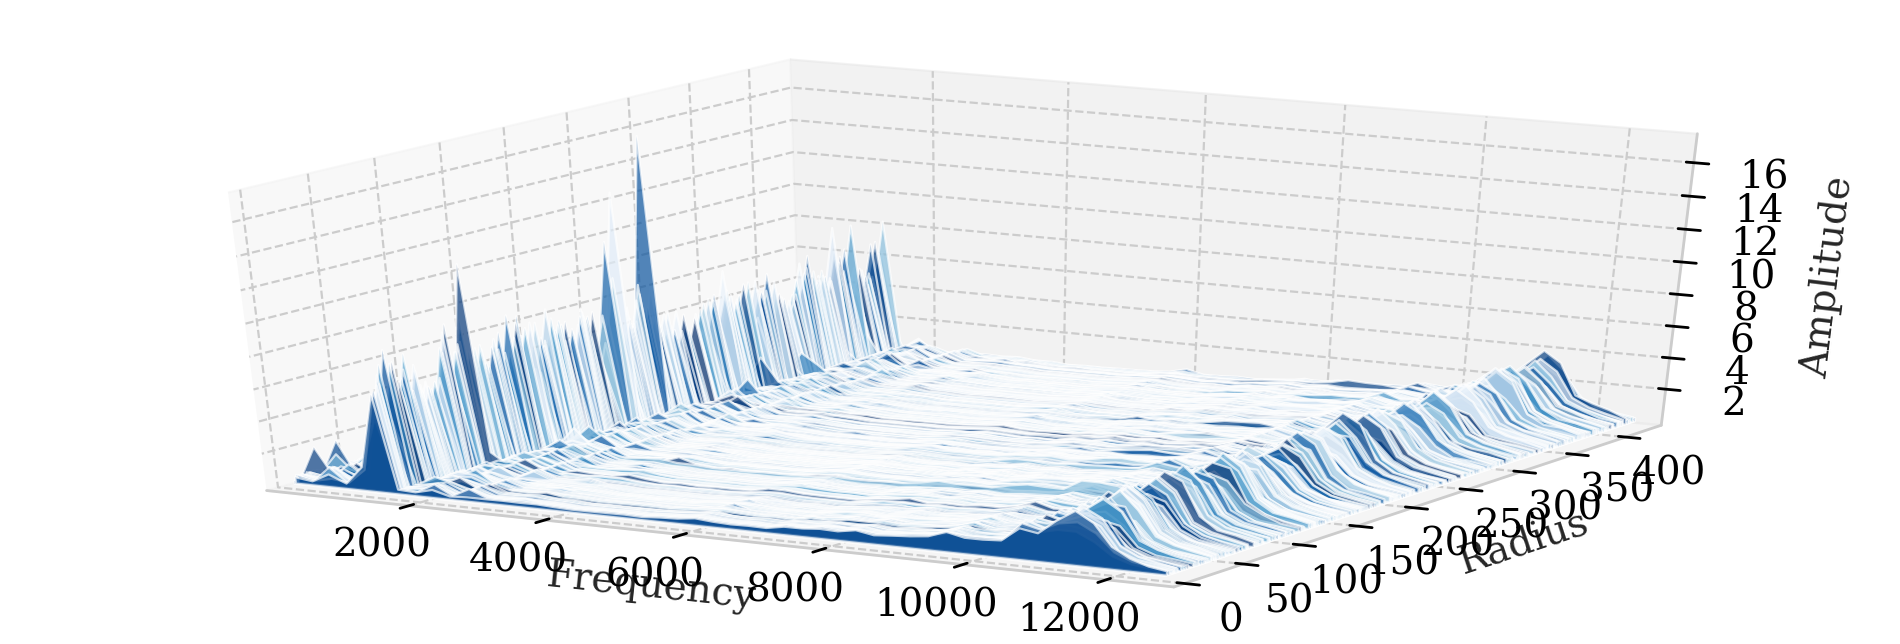

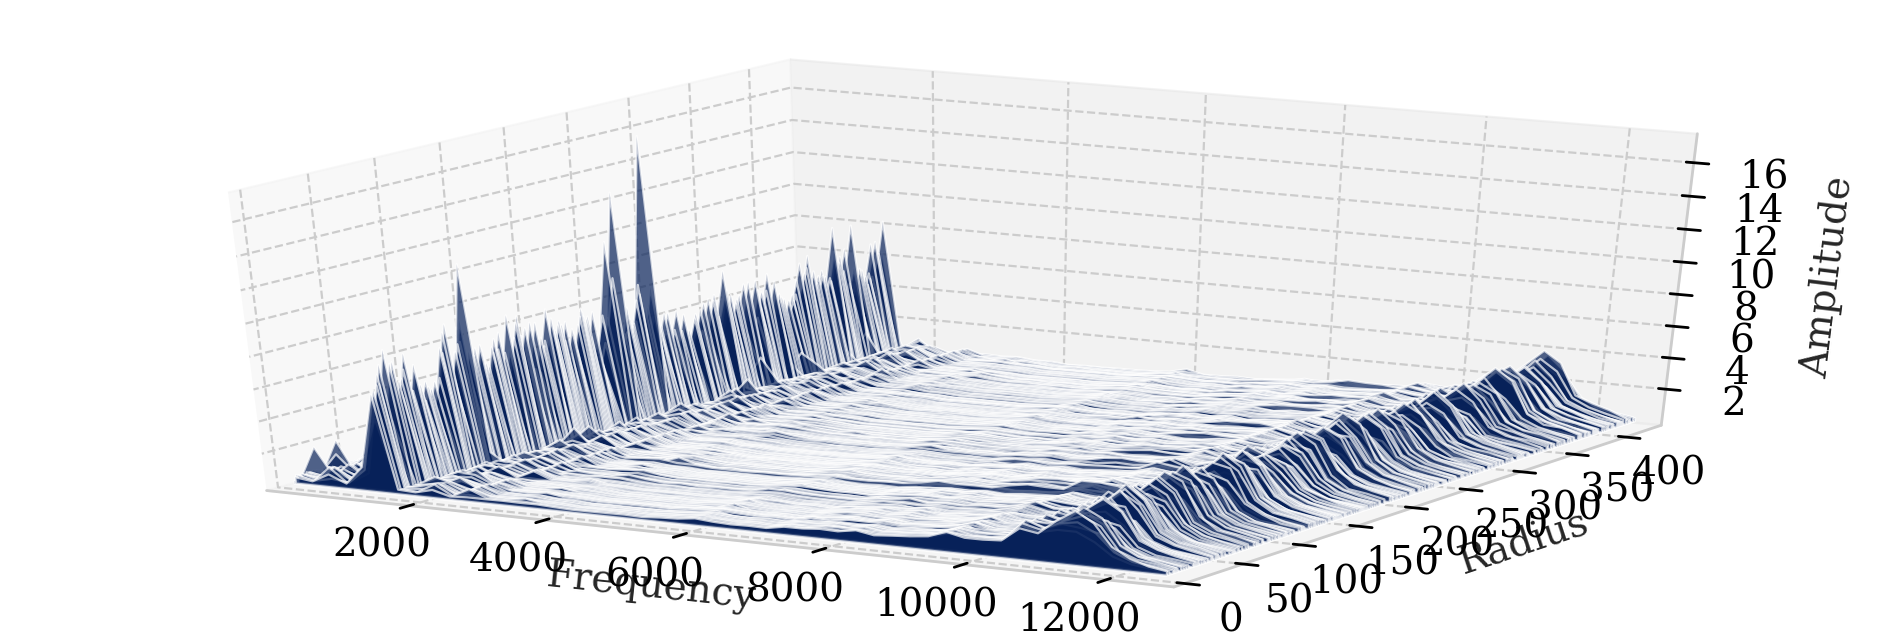

In [115]:
print3d_with_poly_collection( freqs_wt02, interval_nums_wt02, rms_amplitudes_wt02,'color_alt2','Blues' )
print3d_with_poly_collection( freqs_wt02, interval_nums_wt02, rms_amplitudes_wt02,'color_alt3' )